# *Task 3 -Prediction using Unsupervised ML*


# Name- Kshitij Rao

## *Question*

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. ###

## *Importing the libraries*

In [100]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## *Load The Iris Dataset*

In [101]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## *Finding the optimum number of clusters for k-means classification (Within Cluster Sum Of Squares)*

###  *The KMeans Algorithm clusters data by trying to separate samples in n groups of equal variance,minimizing a criterion known as the inertia or within cluster sum of squares(wcss)*

### *To find the number of groups(clusters) present*




In [102]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values #take all row values multidimensional array 
from sklearn.cluster import KMeans
wcss = []    #(Within cluster sum of Squares)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  


## *Plotting the output onto a line Graph*

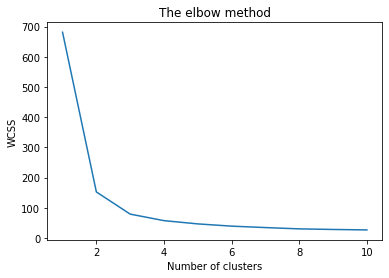

In [103]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### *You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.*

### *From this we choose the number of clusters as 3*

## *Apply kmeans to the dataset/Creating the kmeans classifier*

In [104]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


## *Visualising the clusters - on the first two columns*

### *y_kmeans==0,0 returns a tulpe with first element as an array with true or false as per the condition and second element will be the number after comma specifying the column number* 

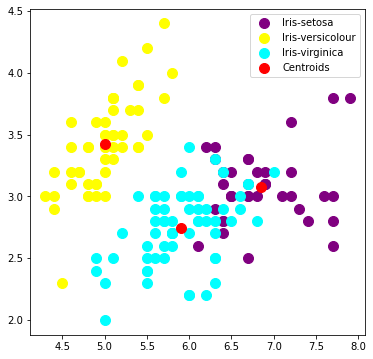

In [105]:
plt.figure(figsize=(6,6))   #to adjust size of scatter plot
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
            s=100,c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'cyan', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend(loc=1)

plt.show()

